<a href="https://colab.research.google.com/github/rtajeong/M4_2025/blob/main/lab_08_keras_examples_mnist_reuters_imdb_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More examples on Deep Learning
- from "모두의 딥러닝"

# Deep Learning with Mnist datset

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import sys
import os
import tensorflow as tf

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개
7


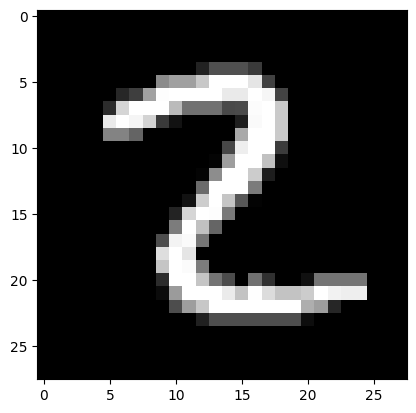

In [37]:
# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[76], cmap='gray') # 0 - black, 255 - white
print(Y_class_train[29])
plt.show()

In [ ]:
# 코드로 확인
X_train.shape, Y_class_train.shape

((60000, 28, 28), (60000,))

In [13]:
# input data reshaping
X_train = X_train.reshape(X_train.shape[0], 784).astype('float64') / 255
X_test  = X_test.reshape(X_test.shape[0], 784).astype('float64')  / 255

X_train = X_train/255.
X_test = X_test/255.

# output one-hot encoding
Y_train = utils.to_categorical(Y_class_train, 10)
Y_test = utils.to_categorical(Y_class_test, 10)

# X_train[0], Y_train[0]
X_train.shape, Y_train.shape

((60000, 784), (60000, 10))

### MLP model

Epoch 1/30
584/600 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1112 - loss: 2.3017
Epoch 1: val_loss improved from inf to 2.30086, saving model to ./mnist_model/01-2.3009.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1112 - loss: 2.3017 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 2/30
596/600 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1114 - loss: 2.3014
Epoch 2: val_loss improved from 2.30086 to 2.30081, saving model to ./mnist_model/02-2.3008.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1114 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3008
Epoch 3/30
585/600 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1130 - loss: 2.3008
Epoch 3: val_loss improved from 2.30081 to 2.30043, saving model to ./mnist_model/03-2.3004.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1129 - loss: 2.3008 - val_accuracy: 0.1135 - val_loss: 2.3004
Epoch 4/30
590/600 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1149 - loss: 2.3003
Epoch 4: val_lo

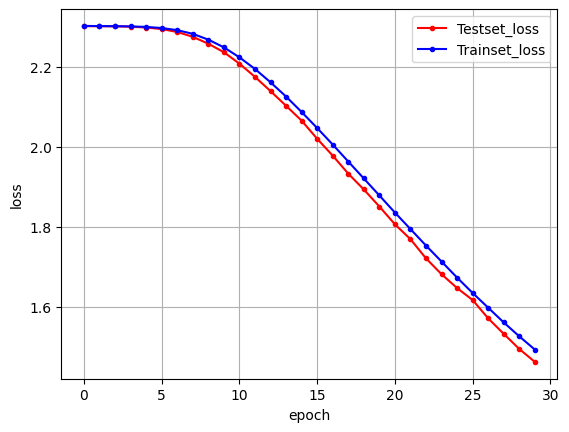

In [14]:
# model
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# model environment (compile)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model callbacks
MODEL_DIR = './mnist_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./mnist_model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# model fitting (train)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=30, batch_size=100, verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

# model evaluation (test)
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# loss
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

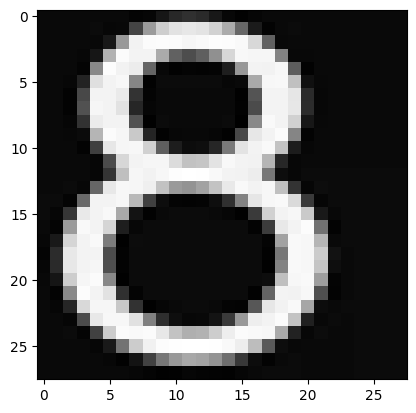

In [36]:
from PIL import Image, ImageOps
image = Image.open('num_8.png' )
image = ImageOps.grayscale(image)
image = np.asarray(image.resize((28,28)))
image = 255. - image
plt.imshow(image, cmap='gray')
print(np.asarray(image).shape)
# model.predict(image.reshape(1, 28,28,1).astype('float64') / 255)
model.predict(image.reshape(1, 28*28)/255.)

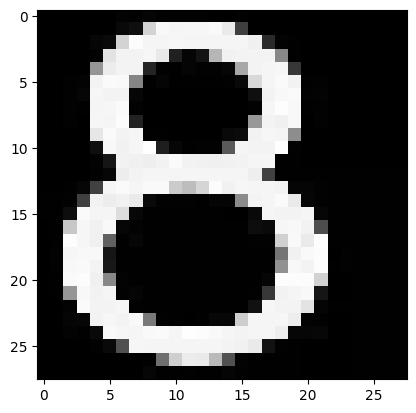

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('num_8.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (28, 28))
image = 255 - image

plt.imshow(image, cmap='gray')
plt.show()

print(image.shape)

# Dense 입력 (batch, features)
model.predict(image.reshape(1, 28*28)/255.)

### Using CNN model

In [38]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = utils.to_categorical(Y_train)
Y_test = utils.to_categorical(Y_test)

In [39]:
X_train.shape, Y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [40]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 400,778 (1.53 MB)

 Trainable params: 400,778 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

- ModelCheckpoint(): 모델이 학습하면서 정의한 조건을 만족했을 때 Model의 weight 값을 중간 저장한다. 학습시간이 오래 걸린다면, 모델이 개선된 validation score를 도출해낼 때마다 weight를 중간 저장함으로써, 혹시 중간에 memory overflow나 crash가 나더라도 다시 weight를 불러와서 학습을 이어나갈 수 있기 때문에, 시간을 save해 줄 수 있다.

In [41]:
import os
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

MODEL_DIR = './mnist_cnn_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./mnist_cnn_model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [42]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=30, batch_size=100, verbose=0,
                    callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 1: val_loss improved from inf to 0.04647, saving model to ./mnist_cnn_model/01-0.0465.keras

Epoch 2: val_loss improved from 0.04647 to 0.03713, saving model to ./mnist_cnn_model/02-0.0371.keras

Epoch 3: val_loss improved from 0.03713 to 0.02589, saving model to ./mnist_cnn_model/03-0.0259.keras

Epoch 4: val_loss did not improve from 0.02589

Epoch 5: val_loss improved from 0.02589 to 0.02426, saving model to ./mnist_cnn_model/05-0.0243.keras

Epoch 6: val_loss did not improve from 0.02426

Epoch 7: val_loss improved from 0.02426 to 0.02168, saving model to ./mnist_cnn_model/07-0.0217.keras

Epoch 8: val_loss did not improve from 0.02168

Epoch 9: val_loss did not improve from 0.02168

Epoch 10: val_loss did not improve from 0.02168

Epoch 11: val_loss did not improve from 0.02168

Epoch 12: val_loss did not improve from 0.02168

Epoch 13: val_loss did not improve from 0.02168

Epoch 14: val_loss did not improve from 0.02168

Epoch 15: val_loss did not improve from 0.02168

Ep

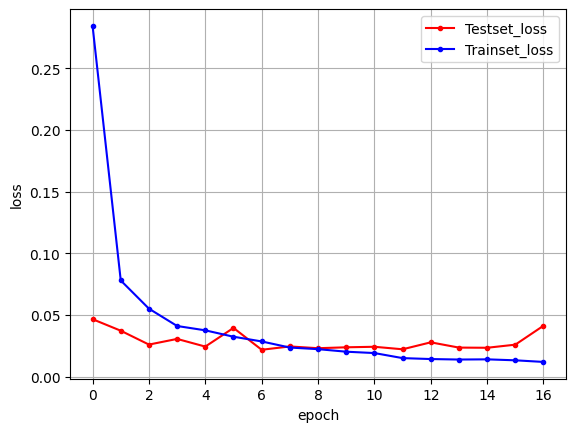

In [43]:
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

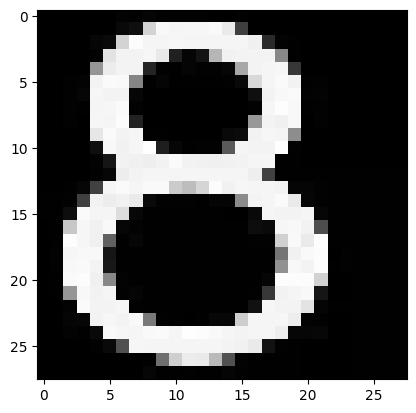

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step


array([[0.00393215, 0.00176646, 0.00664151, 0.05567912, 0.01351622,
        0.05889112, 0.00336581, 0.00319512, 0.76811117, 0.08490134]],
      dtype=float32)

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('num_8.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (28, 28))
image = 255 - image

plt.imshow(image, cmap='gray')
plt.show()

print(image.shape)

# Dense 입력 (batch, features)
model.predict(image.reshape(1,28,28,1)/255.)

In [47]:
model.predict(image.reshape(1, 28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

# Reuters news category classification

## Embedding layer
- v = Embedding(20001 ,256, input_length=500)
  - input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
  - output_dim: Integer. Dimension of the dense embedding.
  - input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).
- shape:
  - Input shape: 2D tensor with shape: (batch_size, input_length)
  - Output shape: 3D tensor with shape: (batch_size, input_length, output_dim).

- 임베딩 층은 다음과 같은 세 개의 인자를 받는다.
  - 첫번째 인자 : 텍스트 데이터의 전체 단어 집합의 크기다. 만약 갖고 있는 데이터의 단어들이 인코딩이 0부터 20,000까지 되었다면 단어 집합의 크기는 20,001이 되어야 한다. (인덱스에 주의)
  - 두번째 인자 : 임베딩이 되고 난 후의 단어의 차원이다. 만약, 이 값을 256으로 준다면 모든 단어의 차원이 256이 된다.
  - input_length : 입력 시퀀스의 길이다. 만약 갖고 있는 각 데이터의 길이가 500개의 단어로 구성되어있다면 이 값은 500이 된다.
- Turns positive integers (indexes) into dense vectors of fixed size.
e.g. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]

In [48]:
# example
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence = ['멋있어 최고야 짱이다 감탄이다 우와',
            '헛소리 지껄이네',
            '닥쳐 자식아',
            '우와 대단하다',
            '우수한 성적',
            '형편없다',
            '최상의 퀄리티 멋있어']
y_train = [1, 0, 0, 1, 1, 0, 1]    # positive(1) or negative(0)
t = Tokenizer()
t.fit_on_texts(sentence)

In [49]:
t.word_index, len(t.word_index)

({'멋있어': 1,
  '우와': 2,
  '최고야': 3,
  '짱이다': 4,
  '감탄이다': 5,
  '헛소리': 6,
  '지껄이네': 7,
  '닥쳐': 8,
  '자식아': 9,
  '대단하다': 10,
  '우수한': 11,
  '성적': 12,
  '형편없다': 13,
  '최상의': 14,
  '퀄리티': 15},
 15)

In [ ]:
t.index_word

{1: '멋있어',
 2: '우와',
 3: '최고야',
 4: '짱이다',
 5: '감탄이다',
 6: '헛소리',
 7: '지껄이네',
 8: '닥쳐',
 9: '자식아',
 10: '대단하다',
 11: '우수한',
 12: '성적',
 13: '형편없다',
 14: '최상의',
 15: '퀄리티'}

In [ ]:
t.texts_to_sequences(sentence)

[[1, 3, 4, 5, 2], [6, 7], [8, 9], [2, 10], [11, 12], [13], [14, 15, 1]]

In [ ]:
vocab_size = len(t.word_index)
x_encoded = t.texts_to_sequences(sentence)
max_length = max(len(i) for i in x_encoded)
print(max_length)
x_padded = pad_sequences(x_encoded, maxlen=max_length, padding='post')
print(x_padded)

5
[[ 1  3  4  5  2]
 [ 6  7  0  0  0]
 [ 8  9  0  0  0]
 [ 2 10  0  0  0]
 [11 12  0  0  0]
 [13  0  0  0  0]
 [14 15  1  0  0]]


- Embedding layers are just trainable lookup tables !!!

In [ ]:
# Embedding(): input shape : (input_dim, output_dim, [input_length])
#                           input_length: Length of input sequences, when it is constant.
#                           This argument is required if you are going to
#                           connect Flatten then Dense layers upstream (without it,
#                           the shape of the dense outputs cannot be computed).
#              output shape : (batch_size, input_length, output_dim)


model = Sequential()
model.add(Embedding(vocab_size, 4, input_length=max_length))
# 모든 임베딩 벡터는 4차원을 가지게 됨.
model.add(Flatten()) # Dense의 입력으로 넣기 위함임.
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 4)              60        
                                                                 
 flatten_1 (Flatten)         (None, 20)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# no of parameters in Embedding layer: 15 * 4 = 60   # just a lookup table !

## Reuter Dataset

In [50]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras import utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
dir(reuters)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'get_label_names',
 'get_word_index',
 'load_data']

In [51]:
# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000,
                                                         test_split=0.2)

# 데이터 확인하기

category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])
[len(X_train[i]) for i in range(10)]

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


[87, 56, 139, 224, 101, 116, 100, 100, 82, 106]

In [52]:
np.unique(Y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

- 딥러닝은 단어 대신 숫자를 데이터로 요구함. 여기서는 해당 단어가 데이터 안에서 몇 번이나 사용되었는지
- 빈도에 따라 번호를 붙임.  -> tokenizer 함수 필요
- keras 는 이미 이 작업이 수행된 상태임.
- num_words = 1000: 빈도가 1~1000 에 해당하는 단어만 선택해서 불러옴
- 각 기사의 단어 수가 각각 다르므로 단어의 수를 맞춰 주어야 함. (전처리 함수 sequence 사용) : 100보다 크면 100개만, 적으면 0 으로 패딩.

In [ ]:
print(X_train[0], len(X_train[0]), Y_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12] 87 3


In [53]:
# 데이터 전처리
x_train = preprocessing.sequence.pad_sequences(X_train, maxlen=100)  # padding=pre is default
x_test = preprocessing.sequence.pad_sequences(X_test, maxlen=100)
y_train = utils.to_categorical(Y_train)
y_test = utils.to_categorical(Y_test)
print(x_train.shape, y_train.shape)
[len(x_train[i]) for i in range(10)]

(8982, 100) (8982, 46)


[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [54]:
model = Sequential()
model.add(Input(shape=(100,)))
model.add(Embedding(1000, 50))   # (100,50)
model.add(LSTM(100, activation='relu'))            # (100,)
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 50)        │        50,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 46)             │         4,646 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,046 (449.40 KB)

 Trainable params: 115,046 (449.40 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# no of parameters in LSTM: ((100+100)*100 + 100 ) * 4

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.3236 - loss: 8356.5283 - val_accuracy: 0.3620 - val_loss: 3.1758
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3550 - loss: 2.9915 - val_accuracy: 0.3620 - val_loss: 2.6073
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3535 - loss: 2.5481 - val_accuracy: 0.3620 - val_loss: 2.4189
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3455 - loss: 2.4068 - val_accuracy: 0.3620 - val_loss: 2.3577
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3546 - loss: 2.4396 - val_accuracy: 0.3620 - val_loss: 2.3436
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3580 - loss: 5.7046 - val_accuracy: 0.3620 - val_loss: 2.3181
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3498 - loss: 2.2810 - val_accuracy: 0.3669 - val_loss: 166070000.0000
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3676 - loss: 11.3708 - val_accuracy

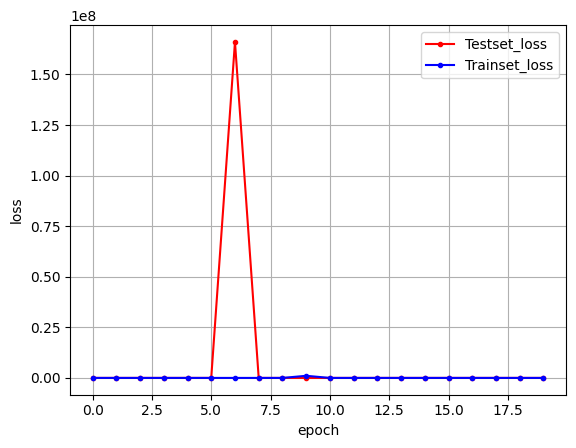

In [55]:
import numpy as np

model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=100, epochs=20,
                    validation_data=(x_test, y_test))

print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# visualize
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# IMDB(Internet Movie databse) with LSTM/CNN
- 영화 정보, 출연진, 개봉 정보, 연화 후기, 평점 등
- 25,000 여개 데이터에 대해 긍정/부정 평가 (binary)
- 앞의 로이터 뉴스 처럼 각 데이터의 전처리를 마친 상태임

## Conv1D
- usually used for NLP
- 아래 예제: vector_lebgth=6, kernel_size=2,

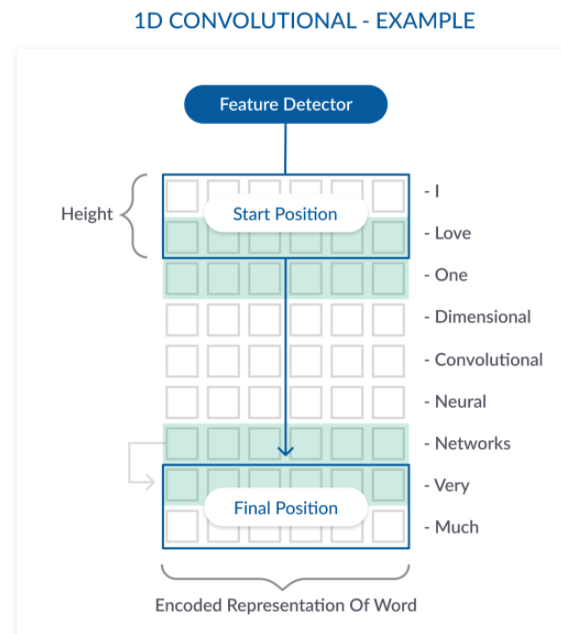

- in NLP, row(vocab), column(embedding_features)
- that is, filter_size = (n, embedding_dim)

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding

from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

x_train = sequence.pad_sequences(x_train, maxlen=100)  # max word in sentence = 100
x_test = sequence.pad_sequences(x_test, maxlen=100)

model = Sequential()
model.add(Embedding(5000, 100, input_length=100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          500000    
                                                                 
 dropout_4 (Dropout)         (None, 100, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 64)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_12 (Dense)            (None, 1)                 

- 1DConv: (5\*100)*64 + 64 = 32,064
- (5 window \* 100 length) * 64 filters + 64

Epoch 1/10
250/250 [==============================] - 4s 10ms/step - loss: 0.4486 - accuracy: 0.7747 - val_loss: 0.3521 - val_accuracy: 0.8420
Epoch 2/10
250/250 [==============================] - 2s 8ms/step - loss: 0.2937 - accuracy: 0.8765 - val_loss: 0.3271 - val_accuracy: 0.8577
Epoch 3/10
250/250 [==============================] - 2s 8ms/step - loss: 0.2526 - accuracy: 0.8970 - val_loss: 0.3252 - val_accuracy: 0.8586
Epoch 4/10
250/250 [==============================] - 2s 8ms/step - loss: 0.2124 - accuracy: 0.9184 - val_loss: 0.3421 - val_accuracy: 0.8544
Epoch 5/10
250/250 [==============================] - 2s 8ms/step - loss: 0.1806 - accuracy: 0.9316 - val_loss: 0.3563 - val_accuracy: 0.8528
Epoch 6/10
250/250 [==============================] - 2s 8ms/step - loss: 0.1454 - accuracy: 0.9462 - val_loss: 0.4119 - val_accuracy: 0.8484
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 0.1140 - accuracy: 0.9583 - val_loss: 0.4318 - val_accuracy: 0.8434
Epoch

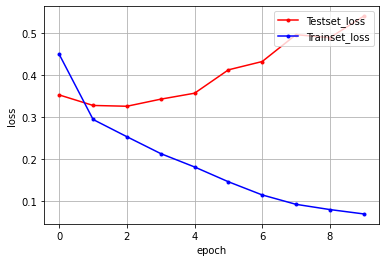

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(x_test, y_test))

print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# ---------
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Exercise (연습)
- https://www.youtube.com/watch?v=kKDYtZfriI8

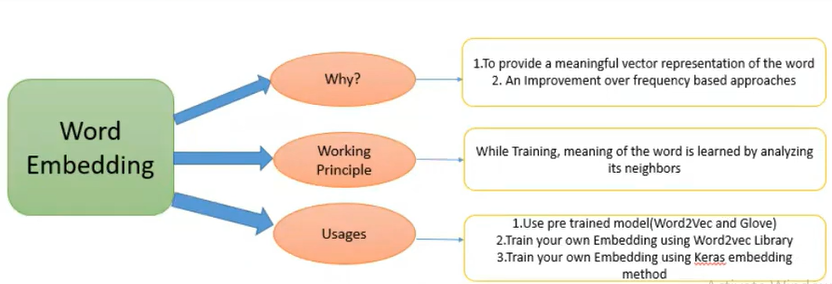

In [ ]:
# 1. training own word2vec model
#    - based on proximit
#    - called self-supervised (unsupervised from the programmer's view,
#      but, internally it uses proximity as loss function)

tokenized_docs = \
       [['Hello', 'how', 'are', 'you'],
        ['how', 'are', 'you'],
        ['how', 'are', 'you', 'doing'],
        ['Hello', 'how', 'are', 'you'],
        ['how', 'are', 'you'],
        ['how', 'are', 'you', 'doing'],
        ['I', 'am', 'great'],
        ['I', 'am', 'great'],
        ['I', 'am', 'good', 'great'],
        ['I', 'am', 'good', 'good'],
        ['I', 'am', 'good'],
        ['I', 'am', 'good']]

In [ ]:
from gensim.models import Word2Vec
wv_model = Word2Vec(tokenized_docs, size=4, min_count=1)
print(wv_model)

Word2Vec(vocab=9, size=4, alpha=0.025)


In [ ]:
words = list(wv_model.wv.vocab)
print(words)

['Hello', 'how', 'are', 'you', 'doing', 'I', 'am', 'great', 'good']


In [ ]:
wv_model[['Hello', 'how', 'am']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.09366921,  0.0070674 , -0.054464  , -0.10621946],
       [ 0.0768868 ,  0.08689176, -0.05399377, -0.02158812],
       [ 0.05682886, -0.00456547,  0.05806162, -0.06634626]],
      dtype=float32)

In [ ]:
wv_model[words]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.09366921,  0.0070674 , -0.054464  , -0.10621946],
       [ 0.0768868 ,  0.08689176, -0.05399377, -0.02158812],
       [ 0.02933977,  0.00228206,  0.0957686 , -0.09899046],
       [-0.04785965,  0.03801018, -0.05480398,  0.01108732],
       [ 0.0158994 ,  0.0282212 , -0.07289593,  0.00214731],
       [-0.02079492,  0.07292659,  0.07502295,  0.09748755],
       [ 0.05682886, -0.00456547,  0.05806162, -0.06634626],
       [-0.12397648, -0.00702965, -0.04377686, -0.05017928],
       [-0.01484818,  0.00973193, -0.11848738, -0.11595665]],
      dtype=float32)

In [ ]:
wv_model.wv.most_similar('Hello')

[('good', 0.6889269948005676),
 ('how', 0.6619775891304016),
 ('am', 0.5753598809242249),
 ('doing', 0.44805198907852173),
 ('are', 0.37689337134361267),
 ('great', -0.1844691038131714),
 ('you', -0.1913124918937683),
 ('I', -0.7231501340866089)]

In [ ]:
wv_model.wv[wv_model.wv.vocab]

array([[ 0.09366921,  0.0070674 , -0.054464  , -0.10621946],
       [ 0.0768868 ,  0.08689176, -0.05399377, -0.02158812],
       [ 0.02933977,  0.00228206,  0.0957686 , -0.09899046],
       [-0.04785965,  0.03801018, -0.05480398,  0.01108732],
       [ 0.0158994 ,  0.0282212 , -0.07289593,  0.00214731],
       [-0.02079492,  0.07292659,  0.07502295,  0.09748755],
       [ 0.05682886, -0.00456547,  0.05806162, -0.06634626],
       [-0.12397648, -0.00702965, -0.04377686, -0.05017928],
       [-0.01484818,  0.00973193, -0.11848738, -0.11595665]],
      dtype=float32)

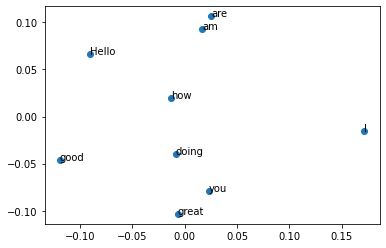

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

X = wv_model.wv[wv_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(wv_model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
# 2. using keras embeding layer
# - trainable(!!!) lookup table
# - supervised learning
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
doc = ['Hello, how are you',
        'how are you',
        'how are you doing',
        'Hello, how are you',
        'how are you',
        'how are you doing',
        'I am great',
        'I am good',
        'I am good good',
        'I am great good',
        'I am good',
        'I am good']
doc_labels = np.array([1,1,1,1,1,1,0,0,0,0,0,0])

In [ ]:
my_vocab_size = 12
encoded_doc = [one_hot(i, my_vocab_size) for i in doc]
print(encoded_doc)

[[11, 11, 9, 4], [11, 9, 4], [11, 9, 4, 10], [11, 11, 9, 4], [11, 9, 4], [11, 9, 4, 10], [2, 7, 7], [2, 7, 5], [2, 7, 5, 5], [2, 7, 7, 5], [2, 7, 5], [2, 7, 5]]


In [ ]:
# just for reference
print(tf.one_hot([1, 2, 0, 1], 3))   # is different from keras.preprocessing.text.one_hot
print(one_hot('Am so happy.', 4))   # returns encoded integers

tf.Tensor(
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]], shape=(4, 3), dtype=float32)
[3, 2, 3]


In [ ]:
length = 5
padded_doc = pad_sequences(encoded_doc, maxlen=length, padding='post')
print(padded_doc)

[[11 11  9  4  0]
 [11  9  4  0  0]
 [11  9  4 10  0]
 [11 11  9  4  0]
 [11  9  4  0  0]
 [11  9  4 10  0]
 [ 2  7  7  0  0]
 [ 2  7  5  0  0]
 [ 2  7  5  5  0]
 [ 2  7  7  5  0]
 [ 2  7  5  0  0]
 [ 2  7  5  0  0]]


In [ ]:
mymodel = Sequential()
mymodel.add(Embedding(my_vocab_size, 4, input_length = length))
mymodel.add(Flatten())
mymodel.add(Dense(1, activation='sigmoid'))
mymodel.summary()
mymodel.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
mymodel.fit(padded_doc, doc_labels, epochs=30, verbose=0)
loss, accuracy = mymodel.evaluate(padded_doc, doc_labels, verbose=0)
print(loss, accuracy)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 5, 4)              48        
                                                                 
 flatten_3 (Flatten)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________
0.6258285641670227 1.0


In [ ]:
mymodel.layers

In [ ]:
mymodel.layers[0].weights   # embedding layer's weights (lookup table)

[<tf.Variable 'embedding_3/embeddings:0' shape=(12, 4) dtype=float32, numpy=
 array([[ 0.00394581, -0.00238088,  0.07799745,  0.05976946],
        [-0.02604306, -0.01613439, -0.01528962, -0.03132309],
        [ 0.06934993,  0.04622018,  0.00878142,  0.02048104],
        [ 0.0383754 ,  0.01999401,  0.02517002,  0.02445346],
        [ 0.08149716, -0.06627405,  0.00954014,  0.00150529],
        [-0.02969147,  0.07746025,  0.03228232,  0.06677242],
        [-0.03308012,  0.01456093,  0.04713755,  0.01071904],
        [ 0.00751726, -0.0716436 , -0.01193686,  0.04097839],
        [-0.04063632,  0.02791988,  0.04675472,  0.03181359],
        [-0.05782157,  0.00639869,  0.06342145, -0.06419306],
        [ 0.03296746, -0.0776177 , -0.07357041, -0.0639096 ],
        [-0.0429817 , -0.01851706, -0.0262629 , -0.02653624]],
       dtype=float32)>]

In [ ]:
mymodel.layers[0](3)    # Embedding layer output for word number 3 => equal to lookup table(3)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.0383754 , 0.01999401, 0.02517002, 0.02445346], dtype=float32)>

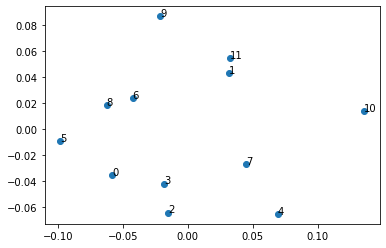

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

X = mymodel.layers[0].weights
pca = PCA(n_components=2)
result = pca.fit_transform(X[0].numpy())

plt.scatter(result[:, 0], result[:, 1])
words = list(range(12))
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
# prediction
sent_to_predict = ['how are you James', 'I am good']
vocab_size = 12
encoded = [one_hot(d, vocab_size) for d in sent_to_predict]
print(encoded)
max_length = 5
padded = pad_sequences(encoded, maxlen=length, padding='post')
print(padded)

[[11, 9, 4, 9], [2, 7, 5]]
[[11  9  4  9  0]
 [ 2  7  5  0  0]]


In [ ]:
print(mymodel.predict(padded))   # probability
print((mymodel.predict(padded) > 0.5).astype("int32"))   # predicted class

1/1 [==============================] - 0s 38ms/step
[[0.5324431]
 [0.4539597]]
1/1 [==============================] - 0s 16ms/step
[[1]
 [0]]


In [ ]:
# 3. using pretrained Word2Vec model
#    - so big.. you will have memory problem.
#    - general, but may not be helpful in your specific problem.
from gensim.models import KeyedVectors
import os

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

--2022-11-23 06:53:00--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.60.192, 52.216.44.224, 52.216.36.200, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.60.192|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-11-23 06:53:00 ERROR 404: Not Found.



In [ ]:
!gunzip 'GoogleNews-vectors-negative300.bin.gz'

gzip: GoogleNews-vectors-negative300.bin.gz: No such file or directory


In [ ]:
pre_trained_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

FileNotFoundError: ignored

In [ ]:
result = pre_trained_model.most_similar('Data')
print(result)

# example

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
# The model will take as input an integer matrix of size (batch,input_length), and
# the largest integer (i.e. word index) in the input  should be no larger than 999
# (vocabulary size). Now model.output_shape is (None, 10, 64), where `None` is the batch
# dimension.
model.summary()
input_array = np.random.randint(1000, size=(100, 10))
model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array.shape)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

docs = ['glass of orange juice',
        'bottle of mango juice',
        'glass of mange shake',
        'drink bottle of banna shake',
        'want glass of cold water',
        'The king and the queen',
        'man and woman']

In [ ]:
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

In [ ]:
t.word_index

In [ ]:
encoded_docs = t.texts_to_sequences(docs)
encoded_docs

In [ ]:
embedding_length = 4
max_doc_len=5
encoded_docs = pad_sequences(encoded_docs, maxlen=max_doc_len, padding='post')
encoded_docs

In [ ]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_length, input_length=max_doc_len)) # output: 5 x 4

model.compile('adam', 'mse')
output = model.predict (encoded_docs)
print(output.shape)
print(output)

In [ ]:
# example 2
model = Sequential()
model.add(Embedding(10,4))
model.compile('adam', 'mse')
print(model.predict(np.array([[4, 8, 3]])))

In [ ]:
model = Sequential()
model.add(Embedding(10,3))
model.compile('adam', 'mse')
print(model.predict(np.array([[4, 4, 4, 3, 3, 3, 8, 9]])))

### 1-D Convolution layer

In [ ]:
# just for your reference - see output shape of conv1d layer
dummy = Sequential()
dummy.add(Embedding(5000, 100, input_length=10))  # vector dim =100
dummy.add(Dropout(0.5))
dummy.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
dummy.summary()